## Libs

In [1]:
import matplotlib as matpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Using the Tensorflow backend (default).
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping

# advanced plotting
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

Using TensorFlow backend.


## Data

In [2]:
%store -r data_EMB
data_EMB.head(2)

,Adj Close
Date,
2009-06-01,57.978580
2009-06-08,57.947876


array([<matplotlib.axes._subplots.AxesSubplot object at 0x107dee240>],
      dtype=object)

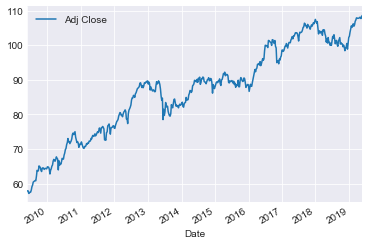

In [3]:
data_EMB.plot(subplots=True)

In [4]:
mm = MinMaxScaler(feature_range = (0,1))

In [5]:
dataset = mm.fit_transform(data_EMB)

In [6]:
#visualize a dataset[0:2]few data
dataset[0:2]

array([[0.01482832],
       [0.01423084]])

1 data every week. 52 data per year, 522 data in total.
* use the past 2 months (8 weeks) to predict 1 week ahead.
* create window of last 8 obs to train model
Parameters:
* history_size - size of past window
* target_size - how far in future model should learn to predict

6 years of training data = 313 weeks. 
Rest of the 209 weeks are for validation.

In [7]:
split = 0.6

train_size = int(len(dataset) * split)
#validation
test_size = len(dataset) - train_size

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

print("training, test set: " + str((len(train), len(test))))

training, test set: (313, 209)


In [8]:
def input_dataset(dataset, window):
    data_X, data_y = [], []
    for i in range(len(dataset) - window - 1):
        a = dataset[i:(i + window), 0]
        data_X.append(a)
        data_y.append(dataset[i + window, 0])
    return(np.array(data_X), np.array(data_y))


In [9]:
# New testing and training sets for rolling forecast.
window = 1
train_X, train_Y = input_dataset(train, window)
test_X, test_Y = input_dataset(test, window)
print("Original train shape:")
print(train_X.shape)

# Reshape input data to match Keras format.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New train shape:")
print(train_X.shape)

Original train shape:
(311, 1)
New train shape:
(311, 1, 1)


## Univar Forecasting Model
* Part 1 - model will be given the last 4 obs and needs to learn to predict price in the next time step.

In [10]:
def fit_LSTM(train_X, train_Y, window = 1, neurons=128):
    set_random_seed(3)
    model = Sequential()
    
    model.add(LSTM(neurons, 
                   input_shape = (1, window)
                  ))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    earlyStop=EarlyStopping(monitor="val_loss",verbose=2,patience=15)
    model.fit(train_X, 
              train_Y, 
              epochs = 2000, 
              batch_size = 25,
              shuffle = False
             # verbose = 2
             )
    
    return(model)

# Fit the first model.
model1 = fit_LSTM(train_X, train_Y, window)

W0917 00:14:23.037118 4431791552 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 00:14:23.038940 4431791552 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 00:14:23.042922 4431791552 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 00:14:23.425759 4431791552 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0917 00:14:23.742460 4431791552 deprecation.py:323] From //anaconda3/li

Epoch 1/3000
311/311 [==============================] - 3s 11ms/step - loss: 0.1984
Epoch 2/3000
311/311 [==============================] - 0s 88us/step - loss: 0.1833
Epoch 3/3000
311/311 [==============================] - 0s 91us/step - loss: 0.1689
Epoch 4/3000
311/311 [==============================] - 0s 89us/step - loss: 0.1551
Epoch 5/3000
311/311 [==============================] - 0s 84us/step - loss: 0.1419
Epoch 6/3000
311/311 [==============================] - 0s 90us/step - loss: 0.1293
Epoch 7/3000
311/311 [==============================] - 0s 92us/step - loss: 0.1173
Epoch 8/3000
311/311 [==============================] - 0s 89us/step - loss: 0.1058
Epoch 9/3000
311/311 [==============================] - 0s 92us/step - loss: 0.0949
Epoch 10/3000
311/311 [==============================] - 0s 85us/step - loss: 0.0846
Epoch 11/3000
311/311 [==============================] - 0s 93us/step - loss: 0.0748
Epoch 12/3000
311/311 [==============================] - 0s 87us/step - lo

311/311 [==============================] - 0s 83us/step - loss: 0.0069
Epoch 98/3000
311/311 [==============================] - 0s 79us/step - loss: 0.0068
Epoch 99/3000
311/311 [==============================] - 0s 79us/step - loss: 0.0067
Epoch 100/3000
311/311 [==============================] - 0s 80us/step - loss: 0.0066
Epoch 101/3000
311/311 [==============================] - 0s 76us/step - loss: 0.0065
Epoch 102/3000
311/311 [==============================] - 0s 87us/step - loss: 0.0063
Epoch 103/3000
311/311 [==============================] - 0s 77us/step - loss: 0.0062
Epoch 104/3000
311/311 [==============================] - 0s 79us/step - loss: 0.0061
Epoch 105/3000
311/311 [==============================] - 0s 78us/step - loss: 0.0060
Epoch 106/3000
311/311 [==============================] - 0s 76us/step - loss: 0.0059
Epoch 107/3000
311/311 [==============================] - 0s 86us/step - loss: 0.0058
Epoch 108/3000
311/311 [==============================] - 0s 76us/step 

311/311 [==============================] - 0s 79us/step - loss: 6.7923e-04
Epoch 192/3000
311/311 [==============================] - 0s 87us/step - loss: 6.6312e-04
Epoch 193/3000
311/311 [==============================] - 0s 86us/step - loss: 6.4769e-04
Epoch 194/3000
311/311 [==============================] - 0s 78us/step - loss: 6.3291e-04
Epoch 195/3000
311/311 [==============================] - 0s 88us/step - loss: 6.1876e-04
Epoch 196/3000
311/311 [==============================] - 0s 80us/step - loss: 6.0523e-04
Epoch 197/3000
311/311 [==============================] - 0s 81us/step - loss: 5.9229e-04
Epoch 198/3000
311/311 [==============================] - 0s 82us/step - loss: 5.7993e-04
Epoch 199/3000
311/311 [==============================] - 0s 82us/step - loss: 5.6812e-04
Epoch 200/3000
311/311 [==============================] - 0s 85us/step - loss: 5.5685e-04
Epoch 201/3000
311/311 [==============================] - 0s 77us/step - loss: 5.4610e-04
Epoch 202/3000
311/311 [=

311/311 [==============================] - 0s 133us/step - loss: 3.5809e-04
Epoch 283/3000
311/311 [==============================] - 0s 89us/step - loss: 3.5801e-04
Epoch 284/3000
311/311 [==============================] - 0s 92us/step - loss: 3.5794e-04
Epoch 285/3000
311/311 [==============================] - 0s 82us/step - loss: 3.5787e-04
Epoch 286/3000
311/311 [==============================] - 0s 81us/step - loss: 3.5780e-04
Epoch 287/3000
311/311 [==============================] - 0s 86us/step - loss: 3.5773e-04
Epoch 288/3000
311/311 [==============================] - 0s 84us/step - loss: 3.5767e-04
Epoch 289/3000
311/311 [==============================] - 0s 85us/step - loss: 3.5761e-04
Epoch 290/3000
311/311 [==============================] - 0s 81us/step - loss: 3.5755e-04
Epoch 291/3000
311/311 [==============================] - 0s 78us/step - loss: 3.5749e-04
Epoch 292/3000
311/311 [==============================] - 0s 80us/step - loss: 3.5744e-04
Epoch 293/3000
311/311 [

311/311 [==============================] - 0s 101us/step - loss: 3.5492e-04
Epoch 373/3000
311/311 [==============================] - 0s 97us/step - loss: 3.5490e-04
Epoch 374/3000
311/311 [==============================] - 0s 97us/step - loss: 3.5487e-04
Epoch 375/3000
311/311 [==============================] - 0s 95us/step - loss: 3.5484e-04
Epoch 376/3000
311/311 [==============================] - 0s 95us/step - loss: 3.5481e-04
Epoch 377/3000
311/311 [==============================] - 0s 97us/step - loss: 3.5479e-04
Epoch 378/3000
311/311 [==============================] - 0s 99us/step - loss: 3.5476e-04
Epoch 379/3000
311/311 [==============================] - 0s 99us/step - loss: 3.5473e-04
Epoch 380/3000
311/311 [==============================] - 0s 109us/step - loss: 3.5470e-04
Epoch 381/3000
311/311 [==============================] - 0s 105us/step - loss: 3.5467e-04
Epoch 382/3000
311/311 [==============================] - 0s 102us/step - loss: 3.5465e-04
Epoch 383/3000
311/31

311/311 [==============================] - 0s 83us/step - loss: 3.5228e-04
Epoch 464/3000
311/311 [==============================] - 0s 83us/step - loss: 3.5225e-04
Epoch 465/3000
311/311 [==============================] - 0s 85us/step - loss: 3.5222e-04
Epoch 466/3000
311/311 [==============================] - 0s 84us/step - loss: 3.5219e-04
Epoch 467/3000
311/311 [==============================] - 0s 85us/step - loss: 3.5216e-04
Epoch 468/3000
311/311 [==============================] - 0s 84us/step - loss: 3.5213e-04
Epoch 469/3000
311/311 [==============================] - 0s 86us/step - loss: 3.5210e-04
Epoch 470/3000
311/311 [==============================] - 0s 88us/step - loss: 3.5207e-04
Epoch 471/3000
311/311 [==============================] - 0s 87us/step - loss: 3.5204e-04
Epoch 472/3000
311/311 [==============================] - 0s 107us/step - loss: 3.5201e-04
Epoch 473/3000
311/311 [==============================] - 0s 100us/step - loss: 3.5198e-04
Epoch 474/3000
311/311 

311/311 [==============================] - 0s 86us/step - loss: 3.4938e-04
Epoch 555/3000
311/311 [==============================] - 0s 95us/step - loss: 3.4935e-04
Epoch 556/3000
311/311 [==============================] - 0s 87us/step - loss: 3.4931e-04
Epoch 557/3000
311/311 [==============================] - 0s 90us/step - loss: 3.4928e-04
Epoch 558/3000
311/311 [==============================] - 0s 91us/step - loss: 3.4925e-04
Epoch 559/3000
311/311 [==============================] - 0s 84us/step - loss: 3.4921e-04
Epoch 560/3000
311/311 [==============================] - 0s 82us/step - loss: 3.4918e-04
Epoch 561/3000
311/311 [==============================] - 0s 82us/step - loss: 3.4915e-04
Epoch 562/3000
311/311 [==============================] - 0s 88us/step - loss: 3.4911e-04
Epoch 563/3000
311/311 [==============================] - 0s 85us/step - loss: 3.4908e-04
Epoch 564/3000
311/311 [==============================] - 0s 82us/step - loss: 3.4905e-04
Epoch 565/3000
311/311 [=

311/311 [==============================] - 0s 93us/step - loss: 3.4628e-04
Epoch 646/3000
311/311 [==============================] - 0s 90us/step - loss: 3.4624e-04
Epoch 647/3000
311/311 [==============================] - 0s 82us/step - loss: 3.4621e-04
Epoch 648/3000
311/311 [==============================] - 0s 81us/step - loss: 3.4617e-04
Epoch 649/3000
311/311 [==============================] - 0s 85us/step - loss: 3.4614e-04
Epoch 650/3000
311/311 [==============================] - 0s 83us/step - loss: 3.4610e-04
Epoch 651/3000
311/311 [==============================] - 0s 83us/step - loss: 3.4607e-04
Epoch 652/3000
311/311 [==============================] - 0s 82us/step - loss: 3.4603e-04
Epoch 653/3000
311/311 [==============================] - 0s 87us/step - loss: 3.4600e-04
Epoch 654/3000
311/311 [==============================] - 0s 81us/step - loss: 3.4596e-04
Epoch 655/3000
311/311 [==============================] - 0s 82us/step - loss: 3.4593e-04
Epoch 656/3000
311/311 [=

311/311 [==============================] - 0s 89us/step - loss: 3.4306e-04
Epoch 737/3000
311/311 [==============================] - 0s 81us/step - loss: 3.4302e-04
Epoch 738/3000
311/311 [==============================] - 0s 83us/step - loss: 3.4298e-04
Epoch 739/3000
311/311 [==============================] - 0s 82us/step - loss: 3.4295e-04
Epoch 740/3000
311/311 [==============================] - 0s 81us/step - loss: 3.4291e-04
Epoch 741/3000
311/311 [==============================] - 0s 80us/step - loss: 3.4288e-04
Epoch 742/3000
311/311 [==============================] - 0s 87us/step - loss: 3.4284e-04
Epoch 743/3000
311/311 [==============================] - 0s 87us/step - loss: 3.4280e-04
Epoch 744/3000
311/311 [==============================] - 0s 81us/step - loss: 3.4277e-04
Epoch 745/3000
311/311 [==============================] - 0s 81us/step - loss: 3.4273e-04
Epoch 746/3000
311/311 [==============================] - 0s 81us/step - loss: 3.4270e-04
Epoch 747/3000
311/311 [=

311/311 [==============================] - 0s 86us/step - loss: 3.3981e-04
Epoch 828/3000
311/311 [==============================] - 0s 85us/step - loss: 3.3978e-04
Epoch 829/3000
311/311 [==============================] - 0s 88us/step - loss: 3.3974e-04
Epoch 830/3000
311/311 [==============================] - 0s 80us/step - loss: 3.3971e-04
Epoch 831/3000
311/311 [==============================] - 0s 84us/step - loss: 3.3967e-04
Epoch 832/3000
311/311 [==============================] - 0s 79us/step - loss: 3.3964e-04
Epoch 833/3000
311/311 [==============================] - 0s 79us/step - loss: 3.3960e-04
Epoch 834/3000
311/311 [==============================] - 0s 83us/step - loss: 3.3957e-04
Epoch 835/3000
311/311 [==============================] - 0s 83us/step - loss: 3.3953e-04
Epoch 836/3000
311/311 [==============================] - 0s 87us/step - loss: 3.3950e-04
Epoch 837/3000
311/311 [==============================] - 0s 84us/step - loss: 3.3946e-04
Epoch 838/3000
311/311 [=

311/311 [==============================] - 0s 93us/step - loss: 3.3668e-04
Epoch 919/3000
311/311 [==============================] - 0s 88us/step - loss: 3.3664e-04
Epoch 920/3000
311/311 [==============================] - 0s 91us/step - loss: 3.3661e-04
Epoch 921/3000
311/311 [==============================] - 0s 91us/step - loss: 3.3658e-04
Epoch 922/3000
311/311 [==============================] - 0s 91us/step - loss: 3.3654e-04
Epoch 923/3000
311/311 [==============================] - 0s 89us/step - loss: 3.3651e-04
Epoch 924/3000
311/311 [==============================] - 0s 82us/step - loss: 3.3648e-04
Epoch 925/3000
311/311 [==============================] - 0s 82us/step - loss: 3.3644e-04
Epoch 926/3000
311/311 [==============================] - 0s 90us/step - loss: 3.3641e-04
Epoch 927/3000
311/311 [==============================] - 0s 93us/step - loss: 3.3638e-04
Epoch 928/3000
311/311 [==============================] - 0s 96us/step - loss: 3.3635e-04
Epoch 929/3000
311/311 [=

311/311 [==============================] - 0s 82us/step - loss: 3.3380e-04
Epoch 1010/3000
311/311 [==============================] - 0s 82us/step - loss: 3.3377e-04
Epoch 1011/3000
311/311 [==============================] - 0s 84us/step - loss: 3.3374e-04
Epoch 1012/3000
311/311 [==============================] - 0s 84us/step - loss: 3.3371e-04
Epoch 1013/3000
311/311 [==============================] - 0s 82us/step - loss: 3.3368e-04
Epoch 1014/3000
311/311 [==============================] - 0s 85us/step - loss: 3.3365e-04
Epoch 1015/3000
311/311 [==============================] - 0s 81us/step - loss: 3.3362e-04
Epoch 1016/3000
311/311 [==============================] - 0s 87us/step - loss: 3.3359e-04
Epoch 1017/3000
311/311 [==============================] - 0s 83us/step - loss: 3.3356e-04
Epoch 1018/3000
311/311 [==============================] - 0s 81us/step - loss: 3.3353e-04
Epoch 1019/3000
311/311 [==============================] - 0s 87us/step - loss: 3.3350e-04
Epoch 1020/3000

311/311 [==============================] - 0s 86us/step - loss: 3.3135e-04
Epoch 1100/3000
311/311 [==============================] - 0s 83us/step - loss: 3.3133e-04
Epoch 1101/3000
311/311 [==============================] - 0s 87us/step - loss: 3.3130e-04
Epoch 1102/3000
311/311 [==============================] - 0s 85us/step - loss: 3.3128e-04
Epoch 1103/3000
311/311 [==============================] - 0s 86us/step - loss: 3.3125e-04
Epoch 1104/3000
311/311 [==============================] - 0s 84us/step - loss: 3.3123e-04
Epoch 1105/3000
311/311 [==============================] - 0s 89us/step - loss: 3.3121e-04
Epoch 1106/3000
311/311 [==============================] - 0s 86us/step - loss: 3.3118e-04
Epoch 1107/3000
311/311 [==============================] - 0s 86us/step - loss: 3.3116e-04
Epoch 1108/3000
311/311 [==============================] - 0s 87us/step - loss: 3.3113e-04
Epoch 1109/3000
311/311 [==============================] - 0s 86us/step - loss: 3.3111e-04
Epoch 1110/3000

311/311 [==============================] - 0s 96us/step - loss: 3.2944e-04
Epoch 1189/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2942e-04
Epoch 1190/3000
311/311 [==============================] - 0s 94us/step - loss: 3.2940e-04
Epoch 1191/3000
311/311 [==============================] - 0s 97us/step - loss: 3.2938e-04
Epoch 1192/3000
311/311 [==============================] - 0s 91us/step - loss: 3.2937e-04
Epoch 1193/3000
311/311 [==============================] - 0s 93us/step - loss: 3.2935e-04
Epoch 1194/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2933e-04
Epoch 1195/3000
311/311 [==============================] - 0s 93us/step - loss: 3.2931e-04
Epoch 1196/3000
311/311 [==============================] - 0s 98us/step - loss: 3.2929e-04
Epoch 1197/3000
311/311 [==============================] - 0s 98us/step - loss: 3.2928e-04
Epoch 1198/3000
311/311 [==============================] - 0s 96us/step - loss: 3.2926e-04
Epoch 1199/3000

311/311 [==============================] - 0s 91us/step - loss: 3.2807e-04
Epoch 1278/3000
311/311 [==============================] - 0s 102us/step - loss: 3.2805e-04
Epoch 1279/3000
311/311 [==============================] - 0s 105us/step - loss: 3.2804e-04
Epoch 1280/3000
311/311 [==============================] - 0s 108us/step - loss: 3.2803e-04
Epoch 1281/3000
311/311 [==============================] - 0s 102us/step - loss: 3.2802e-04
Epoch 1282/3000
311/311 [==============================] - 0s 98us/step - loss: 3.2801e-04
Epoch 1283/3000
311/311 [==============================] - 0s 96us/step - loss: 3.2799e-04
Epoch 1284/3000
311/311 [==============================] - 0s 94us/step - loss: 3.2798e-04
Epoch 1285/3000
311/311 [==============================] - 0s 99us/step - loss: 3.2797e-04
Epoch 1286/3000
311/311 [==============================] - 0s 89us/step - loss: 3.2796e-04
Epoch 1287/3000
311/311 [==============================] - 0s 95us/step - loss: 3.2795e-04
Epoch 1288/

Epoch 1367/3000
311/311 [==============================] - 0s 102us/step - loss: 3.2718e-04
Epoch 1368/3000
311/311 [==============================] - 0s 92us/step - loss: 3.2717e-04
Epoch 1369/3000
311/311 [==============================] - 0s 93us/step - loss: 3.2716e-04
Epoch 1370/3000
311/311 [==============================] - 0s 94us/step - loss: 3.2716e-04
Epoch 1371/3000
311/311 [==============================] - 0s 94us/step - loss: 3.2715e-04
Epoch 1372/3000
311/311 [==============================] - 0s 91us/step - loss: 3.2714e-04
Epoch 1373/3000
311/311 [==============================] - 0s 99us/step - loss: 3.2713e-04
Epoch 1374/3000
311/311 [==============================] - 0s 96us/step - loss: 3.2713e-04
Epoch 1375/3000
311/311 [==============================] - 0s 96us/step - loss: 3.2712e-04
Epoch 1376/3000
311/311 [==============================] - 0s 94us/step - loss: 3.2711e-04
Epoch 1377/3000
311/311 [==============================] - 0s 94us/step - loss: 3.2711e-0

311/311 [==============================] - 0s 97us/step - loss: 3.2668e-04
Epoch 1457/3000
311/311 [==============================] - 0s 98us/step - loss: 3.2668e-04
Epoch 1458/3000
311/311 [==============================] - 0s 98us/step - loss: 3.2668e-04
Epoch 1459/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2667e-04
Epoch 1460/3000
311/311 [==============================] - 0s 93us/step - loss: 3.2667e-04
Epoch 1461/3000
311/311 [==============================] - 0s 95us/step - loss: 3.2667e-04
Epoch 1462/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2666e-04
Epoch 1463/3000
311/311 [==============================] - 0s 91us/step - loss: 3.2666e-04
Epoch 1464/3000
311/311 [==============================] - 0s 94us/step - loss: 3.2666e-04
Epoch 1465/3000
311/311 [==============================] - 0s 93us/step - loss: 3.2665e-04
Epoch 1466/3000
311/311 [==============================] - 0s 93us/step - loss: 3.2665e-04
Epoch 1467/3000

311/311 [==============================] - 0s 92us/step - loss: 3.2645e-04
Epoch 1546/3000
311/311 [==============================] - 0s 92us/step - loss: 3.2645e-04
Epoch 1547/3000
311/311 [==============================] - 0s 96us/step - loss: 3.2645e-04
Epoch 1548/3000
311/311 [==============================] - 0s 89us/step - loss: 3.2645e-04
Epoch 1549/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2645e-04
Epoch 1550/3000
311/311 [==============================] - 0s 92us/step - loss: 3.2645e-04
Epoch 1551/3000
311/311 [==============================] - 0s 95us/step - loss: 3.2644e-04
Epoch 1552/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2644e-04
Epoch 1553/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2644e-04
Epoch 1554/3000
311/311 [==============================] - 0s 92us/step - loss: 3.2644e-04
Epoch 1555/3000
311/311 [==============================] - 0s 95us/step - loss: 3.2644e-04
Epoch 1556/3000

311/311 [==============================] - 0s 89us/step - loss: 3.2638e-04
Epoch 1636/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2638e-04
Epoch 1637/3000
311/311 [==============================] - 0s 83us/step - loss: 3.2638e-04
Epoch 1638/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2637e-04
Epoch 1639/3000
311/311 [==============================] - 0s 80us/step - loss: 3.2637e-04
Epoch 1640/3000
311/311 [==============================] - 0s 82us/step - loss: 3.2637e-04
Epoch 1641/3000
311/311 [==============================] - 0s 78us/step - loss: 3.2637e-04
Epoch 1642/3000
311/311 [==============================] - 0s 79us/step - loss: 3.2637e-04
Epoch 1643/3000
311/311 [==============================] - 0s 79us/step - loss: 3.2637e-04
Epoch 1644/3000
311/311 [==============================] - 0s 81us/step - loss: 3.2637e-04
Epoch 1645/3000
311/311 [==============================] - 0s 78us/step - loss: 3.2637e-04
Epoch 1646/3000

311/311 [==============================] - 0s 83us/step - loss: 3.2638e-04
Epoch 1726/3000
311/311 [==============================] - 0s 83us/step - loss: 3.2638e-04
Epoch 1727/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2638e-04
Epoch 1728/3000
311/311 [==============================] - 0s 87us/step - loss: 3.2638e-04
Epoch 1729/3000
311/311 [==============================] - 0s 82us/step - loss: 3.2638e-04
Epoch 1730/3000
311/311 [==============================] - 0s 81us/step - loss: 3.2638e-04
Epoch 1731/3000
311/311 [==============================] - 0s 85us/step - loss: 3.2638e-04
Epoch 1732/3000
311/311 [==============================] - 0s 81us/step - loss: 3.2638e-04
Epoch 1733/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2638e-04
Epoch 1734/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2638e-04
Epoch 1735/3000
311/311 [==============================] - 0s 98us/step - loss: 3.2638e-04
Epoch 1736/3000

311/311 [==============================] - 0s 79us/step - loss: 3.2642e-04
Epoch 1816/3000
311/311 [==============================] - 0s 79us/step - loss: 3.2642e-04
Epoch 1817/3000
311/311 [==============================] - 0s 79us/step - loss: 3.2642e-04
Epoch 1818/3000
311/311 [==============================] - 0s 78us/step - loss: 3.2642e-04
Epoch 1819/3000
311/311 [==============================] - 0s 80us/step - loss: 3.2642e-04
Epoch 1820/3000
311/311 [==============================] - 0s 79us/step - loss: 3.2642e-04
Epoch 1821/3000
311/311 [==============================] - 0s 78us/step - loss: 3.2642e-04
Epoch 1822/3000
311/311 [==============================] - 0s 79us/step - loss: 3.2642e-04
Epoch 1823/3000
311/311 [==============================] - 0s 80us/step - loss: 3.2642e-04
Epoch 1824/3000
311/311 [==============================] - 0s 82us/step - loss: 3.2642e-04
Epoch 1825/3000
311/311 [==============================] - 0s 77us/step - loss: 3.2642e-04
Epoch 1826/3000

311/311 [==============================] - 0s 80us/step - loss: 3.2646e-04
Epoch 1906/3000
311/311 [==============================] - 0s 83us/step - loss: 3.2646e-04
Epoch 1907/3000
311/311 [==============================] - 0s 82us/step - loss: 3.2646e-04
Epoch 1908/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2646e-04
Epoch 1909/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2646e-04
Epoch 1910/3000
311/311 [==============================] - 0s 79us/step - loss: 3.2647e-04
Epoch 1911/3000
311/311 [==============================] - 0s 81us/step - loss: 3.2647e-04
Epoch 1912/3000
311/311 [==============================] - 0s 83us/step - loss: 3.2647e-04
Epoch 1913/3000
311/311 [==============================] - 0s 89us/step - loss: 3.2647e-04
Epoch 1914/3000
311/311 [==============================] - 0s 82us/step - loss: 3.2647e-04
Epoch 1915/3000
311/311 [==============================] - 0s 80us/step - loss: 3.2647e-04
Epoch 1916/3000

311/311 [==============================] - 0s 83us/step - loss: 3.2650e-04
Epoch 1996/3000
311/311 [==============================] - 0s 91us/step - loss: 3.2650e-04
Epoch 1997/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2651e-04
Epoch 1998/3000
311/311 [==============================] - 0s 85us/step - loss: 3.2651e-04
Epoch 1999/3000
311/311 [==============================] - 0s 97us/step - loss: 3.2651e-04
Epoch 2000/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2651e-04
Epoch 2001/3000
311/311 [==============================] - 0s 88us/step - loss: 3.2651e-04
Epoch 2002/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2651e-04
Epoch 2003/3000
311/311 [==============================] - 0s 85us/step - loss: 3.2651e-04
Epoch 2004/3000
311/311 [==============================] - 0s 85us/step - loss: 3.2651e-04
Epoch 2005/3000
311/311 [==============================] - 0s 87us/step - loss: 3.2651e-04
Epoch 2006/3000

311/311 [==============================] - 0s 83us/step - loss: 3.2654e-04
Epoch 2086/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2654e-04
Epoch 2087/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2654e-04
Epoch 2088/3000
311/311 [==============================] - 0s 83us/step - loss: 3.2654e-04
Epoch 2089/3000
311/311 [==============================] - 0s 92us/step - loss: 3.2654e-04
Epoch 2090/3000
311/311 [==============================] - 0s 89us/step - loss: 3.2654e-04
Epoch 2091/3000
311/311 [==============================] - 0s 89us/step - loss: 3.2654e-04
Epoch 2092/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2654e-04
Epoch 2093/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2654e-04
Epoch 2094/3000
311/311 [==============================] - 0s 91us/step - loss: 3.2654e-04
Epoch 2095/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2654e-04
Epoch 2096/3000

311/311 [==============================] - 0s 90us/step - loss: 3.2656e-04
Epoch 2176/3000
311/311 [==============================] - 0s 88us/step - loss: 3.2656e-04
Epoch 2177/3000
311/311 [==============================] - 0s 92us/step - loss: 3.2656e-04
Epoch 2178/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2656e-04
Epoch 2179/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2657e-04
Epoch 2180/3000
311/311 [==============================] - 0s 82us/step - loss: 3.2657e-04
Epoch 2181/3000
311/311 [==============================] - 0s 88us/step - loss: 3.2657e-04
Epoch 2182/3000
311/311 [==============================] - 0s 88us/step - loss: 3.2657e-04
Epoch 2183/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2657e-04
Epoch 2184/3000
311/311 [==============================] - 0s 91us/step - loss: 3.2657e-04
Epoch 2185/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2657e-04
Epoch 2186/3000

311/311 [==============================] - 0s 88us/step - loss: 3.2658e-04
Epoch 2266/3000
311/311 [==============================] - 0s 92us/step - loss: 3.2658e-04
Epoch 2267/3000
311/311 [==============================] - 0s 88us/step - loss: 3.2658e-04
Epoch 2268/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2658e-04
Epoch 2269/3000
311/311 [==============================] - 0s 92us/step - loss: 3.2658e-04
Epoch 2270/3000
311/311 [==============================] - 0s 87us/step - loss: 3.2658e-04
Epoch 2271/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2658e-04
Epoch 2272/3000
311/311 [==============================] - 0s 89us/step - loss: 3.2658e-04
Epoch 2273/3000
311/311 [==============================] - 0s 88us/step - loss: 3.2658e-04
Epoch 2274/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2658e-04
Epoch 2275/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2658e-04
Epoch 2276/3000

311/311 [==============================] - 0s 86us/step - loss: 3.2660e-04
Epoch 2356/3000
311/311 [==============================] - 0s 87us/step - loss: 3.2660e-04
Epoch 2357/3000
311/311 [==============================] - 0s 97us/step - loss: 3.2660e-04
Epoch 2358/3000
311/311 [==============================] - 0s 92us/step - loss: 3.2660e-04
Epoch 2359/3000
311/311 [==============================] - 0s 83us/step - loss: 3.2660e-04
Epoch 2360/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2660e-04
Epoch 2361/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2660e-04
Epoch 2362/3000
311/311 [==============================] - 0s 88us/step - loss: 3.2660e-04
Epoch 2363/3000
311/311 [==============================] - 0s 89us/step - loss: 3.2660e-04
Epoch 2364/3000
311/311 [==============================] - 0s 91us/step - loss: 3.2660e-04
Epoch 2365/3000
311/311 [==============================] - 0s 98us/step - loss: 3.2660e-04
Epoch 2366/3000

311/311 [==============================] - 0s 87us/step - loss: 3.2660e-04
Epoch 2446/3000
311/311 [==============================] - 0s 88us/step - loss: 3.2660e-04
Epoch 2447/3000
311/311 [==============================] - 0s 87us/step - loss: 3.2661e-04
Epoch 2448/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2661e-04
Epoch 2449/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2661e-04
Epoch 2450/3000
311/311 [==============================] - 0s 92us/step - loss: 3.2661e-04
Epoch 2451/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2661e-04
Epoch 2452/3000
311/311 [==============================] - 0s 85us/step - loss: 3.2661e-04
Epoch 2453/3000
311/311 [==============================] - 0s 87us/step - loss: 3.2661e-04
Epoch 2454/3000
311/311 [==============================] - 0s 81us/step - loss: 3.2661e-04
Epoch 2455/3000
311/311 [==============================] - 0s 88us/step - loss: 3.2661e-04
Epoch 2456/3000

311/311 [==============================] - 0s 86us/step - loss: 3.2661e-04
Epoch 2536/3000
311/311 [==============================] - 0s 89us/step - loss: 3.2661e-04
Epoch 2537/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2661e-04
Epoch 2538/3000
311/311 [==============================] - 0s 82us/step - loss: 3.2661e-04
Epoch 2539/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2661e-04
Epoch 2540/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2661e-04
Epoch 2541/3000
311/311 [==============================] - 0s 95us/step - loss: 3.2661e-04
Epoch 2542/3000
311/311 [==============================] - 0s 97us/step - loss: 3.2661e-04
Epoch 2543/3000
311/311 [==============================] - 0s 98us/step - loss: 3.2661e-04
Epoch 2544/3000
311/311 [==============================] - 0s 87us/step - loss: 3.2661e-04
Epoch 2545/3000
311/311 [==============================] - 0s 92us/step - loss: 3.2661e-04
Epoch 2546/3000

311/311 [==============================] - 0s 87us/step - loss: 3.2661e-04
Epoch 2626/3000
311/311 [==============================] - 0s 87us/step - loss: 3.2661e-04
Epoch 2627/3000
311/311 [==============================] - 0s 82us/step - loss: 3.2661e-04
Epoch 2628/3000
311/311 [==============================] - 0s 85us/step - loss: 3.2662e-04
Epoch 2629/3000
311/311 [==============================] - 0s 85us/step - loss: 3.2661e-04
Epoch 2630/3000
311/311 [==============================] - 0s 83us/step - loss: 3.2662e-04
Epoch 2631/3000
311/311 [==============================] - 0s 81us/step - loss: 3.2662e-04
Epoch 2632/3000
311/311 [==============================] - 0s 80us/step - loss: 3.2662e-04
Epoch 2633/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2662e-04
Epoch 2634/3000
311/311 [==============================] - 0s 81us/step - loss: 3.2662e-04
Epoch 2635/3000
311/311 [==============================] - 0s 81us/step - loss: 3.2662e-04
Epoch 2636/3000

311/311 [==============================] - 0s 84us/step - loss: 3.2662e-04
Epoch 2716/3000
311/311 [==============================] - 0s 91us/step - loss: 3.2662e-04
Epoch 2717/3000
311/311 [==============================] - 0s 83us/step - loss: 3.2662e-04
Epoch 2718/3000
311/311 [==============================] - 0s 85us/step - loss: 3.2662e-04
Epoch 2719/3000
311/311 [==============================] - 0s 83us/step - loss: 3.2662e-04
Epoch 2720/3000
311/311 [==============================] - 0s 81us/step - loss: 3.2662e-04
Epoch 2721/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2662e-04
Epoch 2722/3000
311/311 [==============================] - 0s 87us/step - loss: 3.2662e-04
Epoch 2723/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2662e-04
Epoch 2724/3000
311/311 [==============================] - 0s 96us/step - loss: 3.2662e-04
Epoch 2725/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2662e-04
Epoch 2726/3000

311/311 [==============================] - 0s 88us/step - loss: 3.2662e-04
Epoch 2806/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2662e-04
Epoch 2807/3000
311/311 [==============================] - 0s 89us/step - loss: 3.2662e-04
Epoch 2808/3000
311/311 [==============================] - 0s 88us/step - loss: 3.2662e-04
Epoch 2809/3000
311/311 [==============================] - 0s 83us/step - loss: 3.2662e-04
Epoch 2810/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2662e-04
Epoch 2811/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2662e-04
Epoch 2812/3000
311/311 [==============================] - 0s 82us/step - loss: 3.2662e-04
Epoch 2813/3000
311/311 [==============================] - 0s 82us/step - loss: 3.2662e-04
Epoch 2814/3000
311/311 [==============================] - 0s 82us/step - loss: 3.2662e-04
Epoch 2815/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2662e-04
Epoch 2816/3000

311/311 [==============================] - 0s 84us/step - loss: 3.2662e-04
Epoch 2896/3000
311/311 [==============================] - 0s 91us/step - loss: 3.2662e-04
Epoch 2897/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2662e-04
Epoch 2898/3000
311/311 [==============================] - 0s 92us/step - loss: 3.2662e-04
Epoch 2899/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2662e-04
Epoch 2900/3000
311/311 [==============================] - 0s 88us/step - loss: 3.2662e-04
Epoch 2901/3000
311/311 [==============================] - 0s 91us/step - loss: 3.2662e-04
Epoch 2902/3000
311/311 [==============================] - 0s 83us/step - loss: 3.2662e-04
Epoch 2903/3000
311/311 [==============================] - 0s 95us/step - loss: 3.2662e-04
Epoch 2904/3000
311/311 [==============================] - 0s 94us/step - loss: 3.2662e-04
Epoch 2905/3000
311/311 [==============================] - 0s 95us/step - loss: 3.2662e-04
Epoch 2906/3000

311/311 [==============================] - 0s 95us/step - loss: 3.2662e-04
Epoch 2985/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2662e-04
Epoch 2986/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2662e-04
Epoch 2987/3000
311/311 [==============================] - 0s 88us/step - loss: 3.2662e-04
Epoch 2988/3000
311/311 [==============================] - 0s 90us/step - loss: 3.2662e-04
Epoch 2989/3000
311/311 [==============================] - 0s 87us/step - loss: 3.2662e-04
Epoch 2990/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2662e-04
Epoch 2991/3000
311/311 [==============================] - 0s 88us/step - loss: 3.2662e-04
Epoch 2992/3000
311/311 [==============================] - 0s 86us/step - loss: 3.2662e-04
Epoch 2993/3000
311/311 [==============================] - 0s 92us/step - loss: 3.2662e-04
Epoch 2994/3000
311/311 [==============================] - 0s 84us/step - loss: 3.2662e-04
Epoch 2995/3000

## Results 
### Predictions and model evaluations
The advantage of using the RMSE is that it's in the same unit as the original data, i.e. price/wk (1.000 passengers / month in Kaggle example).

In [11]:
def prediction_score(model, X, Y):
    # Make predictions using input data
    pred = mm.inverse_transform(model.predict(X))
    # Show Y on original scale
    original_data = mm.inverse_transform([Y])
    # RMSE.
    score = math.sqrt(mean_squared_error(original_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_pred = prediction_score(model1, train_X, train_Y)
rmse_test, test_pred = prediction_score(model1, test_X, test_Y)

print("Training score: %.2f RMSE" % rmse_train)
print("Testing score: %.2f RMSE" % rmse_test)

Training score: 0.93 RMSE
Testing score: 0.88 RMSE


### Plotting and comparing original data, predictions, forecasts

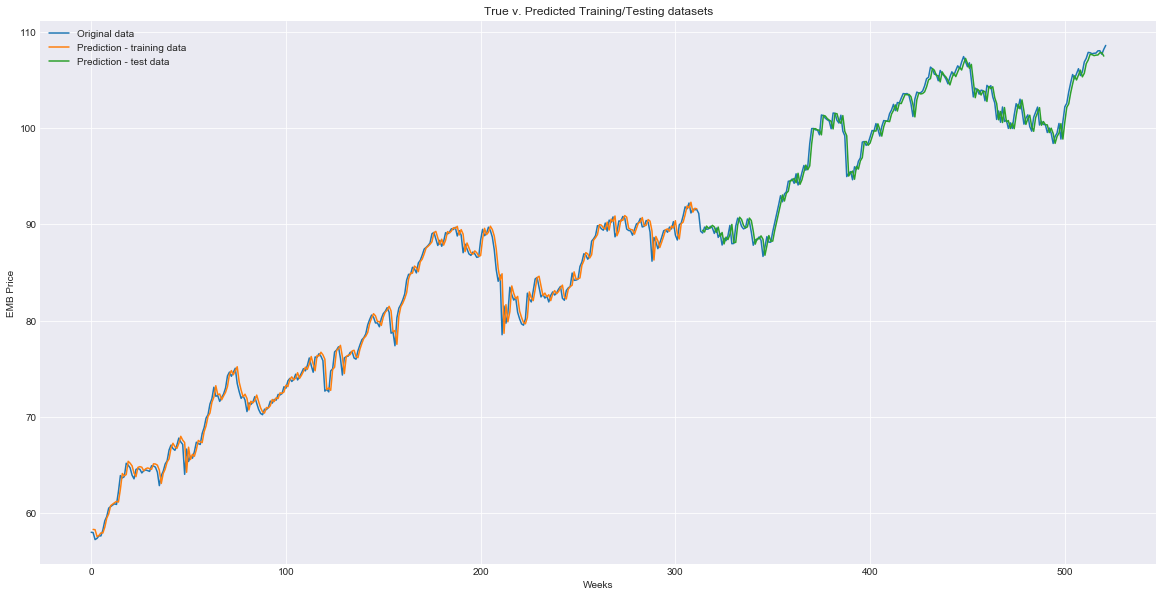

In [12]:
# Train predictions
train_pred_plot = np.empty_like(dataset)
train_pred_plot[:, :] = np.nan
train_pred_plot[window:len(train_pred) + window, :] = train_pred

# Test predictions
test_pred_plot = np.empty_like(dataset)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred) + (window * 2) + 1:len(dataset) - 1, :] = test_pred

#plot
plt.figure(figsize = (20, 10))
plt.plot(mm.inverse_transform(dataset), label = 'Original data')
plt.plot(train_pred_plot, label = 'Prediction - training data')
plt.plot(test_pred_plot, label = 'Prediction - test data')
plt.xlabel('Weeks')
plt.ylabel('EMB Price')
plt.title('True v. Predicted Training/Testing datasets')
plt.legend()
plt.show()

In [13]:
LSTM_pred_EMB = pd.DataFrame(test_pred)
%store LSTM_pred_EMB

Stored 'LSTM_pred_EMB' (DataFrame)
